**DISNEYLAND REVIEWS**

SUBMITTED BY: KHAYATI CHADHA
ROLL NO: 015033
COURSE: FUNCTIONAL ANALYTICS

The dataset includes 42,000 reviews of 3 Disneyland branches - Paris, California and Hong Kong, posted by visitors on Trip Advisor.

Column Description:

Review_ID: unique id given to each review

1.   Rating: ranging from 1 (unsatisfied) to 5 (satisfied)
2.   Year_Month: when the reviewer visited the theme park
3.   Reviewer_Location: country of origin of visitor
4.   Review_Text: comments made by visitor
5.   Disneyland_Branch: location of Disneyland Park


In [2]:
#Installing pyspark, spark-nlp and findspark

!wget http://setup.johnsnowlabs.com/colab.sh -O - | bash

--2021-12-24 06:43:54--  http://setup.johnsnowlabs.com/colab.sh
Resolving setup.johnsnowlabs.com (setup.johnsnowlabs.com)... 51.158.130.125
Connecting to setup.johnsnowlabs.com (setup.johnsnowlabs.com)|51.158.130.125|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://setup.johnsnowlabs.com/colab.sh [following]
--2021-12-24 06:43:56--  https://setup.johnsnowlabs.com/colab.sh
Connecting to setup.johnsnowlabs.com (setup.johnsnowlabs.com)|51.158.130.125|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp/master/scripts/colab_setup.sh [following]
--2021-12-24 06:43:57--  https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp/master/scripts/colab_setup.sh
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:44

In [3]:
#To check contents of colab.sh, colab.sh will be downloaded

!wget http://setup.johnsnowlabs.com/colab.sh 

! cat /content/colab.sh

--2021-12-24 06:44:01--  http://setup.johnsnowlabs.com/colab.sh
Resolving setup.johnsnowlabs.com (setup.johnsnowlabs.com)... 51.158.130.125
Connecting to setup.johnsnowlabs.com (setup.johnsnowlabs.com)|51.158.130.125|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://setup.johnsnowlabs.com/colab.sh [following]
--2021-12-24 06:44:01--  https://setup.johnsnowlabs.com/colab.sh
Connecting to setup.johnsnowlabs.com (setup.johnsnowlabs.com)|51.158.130.125|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp/master/scripts/colab_setup.sh [following]
--2021-12-24 06:44:02--  https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp/master/scripts/colab_setup.sh
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:44

In [4]:
#Calling all the necessary libraries
import pandas as pd
import numpy as np
import os

#Loading all the spark related libraries
from pyspark.ml import Pipeline
from pyspark.sql import SparkSession
import pyspark.sql.functions as F
from pyspark.sql.types import DoubleType, StringType,StructField,StructType
from pyspark.sql.functions import regexp_replace

#Loading all the Spark-nlp related libraries
import sparknlp
from sparknlp.base import *
from sparknlp.annotator import *
from pyspark.ml import Pipeline 
from pyspark.ml.feature import CountVectorizer,StringIndexer, RegexTokenizer,StopWordsRemover
from pyspark.sql.functions import col, udf,regexp_replace,isnull
from pyspark.sql.types import StringType,IntegerType
from pyspark.ml.classification import NaiveBayes
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [5]:
#Creating a Spark session
spark = sparknlp.start()

In [6]:
#Show multiple command outputs from a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [7]:
#Mount gdrive to read data
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [8]:
#Listing the path and reading the dataframe
path = os.chdir("/gdrive/MyDrive/Functional Analytics/")
data_df = pd.read_csv('DisneylandReviews.csv', encoding='latin')
data_df.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong


In [9]:
#viewing the shape of the dataframe
data_df.shape

(42656, 6)

In [10]:
#viewing the different ratings in the dataframe
data_df['Rating'].value_counts()

5    23146
4    10775
3     5109
2     2127
1     1499
Name: Rating, dtype: int64

**BRANCHES PER YEAR**

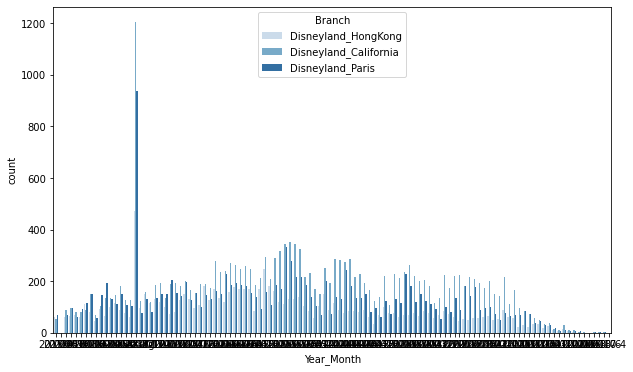

In [11]:
#Plotting the number of branches per year 
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.countplot(data=data_df,x='Year_Month',hue='Branch',palette='Blues');

**QUATER WISE REVIEWS AND RATINGS**

<Figure size 720x432 with 0 Axes>

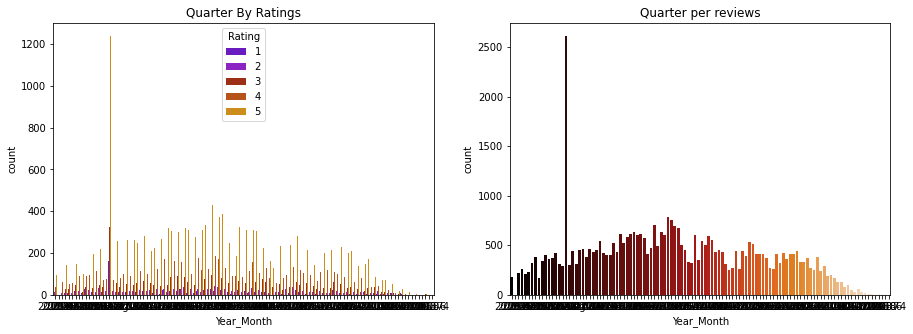

In [12]:
#Plotting the quater wise reviews and ratings
plt.figure(figsize=(10,6));

fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=False);
sns.countplot(ax=axes[0],data=data_df,x='Year_Month',hue='Rating',palette='gnuplot');
axes[0].set_title('Quarter By Ratings');
sns.countplot(ax=axes[1],data=data_df,x='Year_Month',palette='gist_heat');
axes[1].set_title('Quarter per reviews');

there are less reviews in the first quarter of the year

**REVIEWS PER COUNTRY**

In [13]:
#plotting the reviews recieved by different users per country
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import plotly.express as px
fig_df=data_df.groupby('Reviewer_Location',as_index=False).agg({'Branch':'count'}).sort_values('Branch',ascending=False)
fig = px.choropleth(fig_df, 
                    locations='Reviewer_Location', locationmode='country names',
                    color='Branch',
                    color_continuous_scale="portland", hover_data=['Branch'],
                    title='Country - Reviews')
fig.update(layout_coloraxis_showscale=False)
fig.show();

RATES -BRANCH

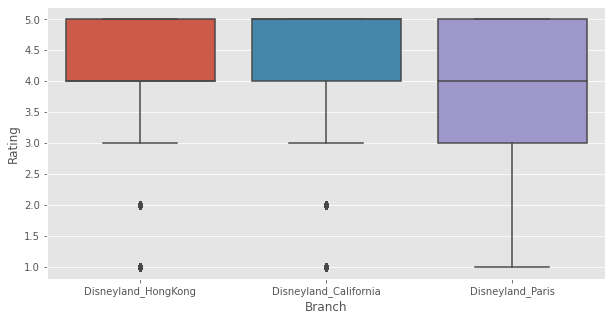

In [14]:
#plotting boxplot for different branches of disneyland
plt.figure(figsize=(10,5))
sns.boxplot(x="Branch", y="Rating", data=data_df);

In [15]:
#Transform pandas to spark dataframe:
spark_df = data_df[['Review_Text','Rating']].copy()
cor_data =spark.createDataFrame(spark_df)

In [16]:
#Examining it
cor_data.show(truncate=False)
cor_data.count()      

+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+------+
|Review_Text        

42656

In [17]:
#Read data directly in spark a normal manner:
pathToFoler = "/gdrive/MyDrive/Functional Analytics/"
fileName = "DisneylandReviews.csv"
data = spark.read.csv(
                      path = pathToFoler + fileName,
                      inferSchema=True,
                      header=True
                      )

In [18]:
#viewing the spark dataframe
data.show()

+---------+------+----------+--------------------+--------------------+-------------------+
|Review_ID|Rating|Year_Month|   Reviewer_Location|         Review_Text|             Branch|
+---------+------+----------+--------------------+--------------------+-------------------+
|670772142|     4|    2019-4|           Australia|If you've ever be...|Disneyland_HongKong|
|670682799|     4|    2019-5|         Philippines|Its been a while ...|Disneyland_HongKong|
|670623270|     4|    2019-4|United Arab Emirates|Thanks God it was...|Disneyland_HongKong|
|670607911|     4|    2019-4|           Australia|HK Disneyland is ...|Disneyland_HongKong|
|670607296|     4|    2019-4|      United Kingdom|the location is n...|Disneyland_HongKong|
|670591897|     3|    2019-4|           Singapore|Have been to Disn...|Disneyland_HongKong|
|670585330|     5|    2019-4|               India|Great place! Your...|Disneyland_HongKong|
|670574142|     3|    2019-3|            Malaysia|Think of it as an...|Disneylan

In [19]:
#viewing the number of entries in spark dataframe
data.count()    

42656

In [20]:
schema = StructType([ \
                     StructField("Review_ID",StringType(),True), \
                     StructField("Rating",StringType(),True), \
                     StructField("Year_Month",StringType(),True), \
                     StructField("Reviewer_Location", StringType(), True), \
                     StructField("Review_Text", StringType(), True), \
                     StructField("Branch", StringType(), True) \
  ])

In [21]:
trainDataset = spark.read  \
                 .option("quote", "\"") \
                 .option('escape', "\"") \
                 .option("multiLine", "true")  \
                 .option("schema" , schema)  \
                 .option("header", "true") \
                 .csv(pathToFoler + fileName)

In [22]:
trainDataset.show()
trainDataset.count() 

+---------+------+----------+--------------------+--------------------+-------------------+
|Review_ID|Rating|Year_Month|   Reviewer_Location|         Review_Text|             Branch|
+---------+------+----------+--------------------+--------------------+-------------------+
|670772142|     4|    2019-4|           Australia|If you've ever be...|Disneyland_HongKong|
|670682799|     4|    2019-5|         Philippines|Its been a while ...|Disneyland_HongKong|
|670623270|     4|    2019-4|United Arab Emirates|Thanks God it was...|Disneyland_HongKong|
|670607911|     4|    2019-4|           Australia|HK Disneyland is ...|Disneyland_HongKong|
|670607296|     4|    2019-4|      United Kingdom|the location is n...|Disneyland_HongKong|
|670591897|     3|    2019-4|           Singapore|Have been to Disn...|Disneyland_HongKong|
|670585330|     5|    2019-4|               India|Great place! Your...|Disneyland_HongKong|
|670574142|     3|    2019-3|            Malaysia|Think of it as an...|Disneylan

42656

In [23]:
from pyspark.sql.functions import col
#grouping the ratings column and arranging in descending order 
trainDataset.groupBy("Rating") \
    .count() \
    .orderBy(col("count").desc()) \
    .show()

+------+-----+
|Rating|count|
+------+-----+
|     5|23146|
|     4|10775|
|     3| 5109|
|     2| 2127|
|     1| 1499|
+------+-----+



In [24]:
#replacing rating value of 1 and 2 with negative, 3 with neutral and 4 and 5 with positive
trainDataset = trainDataset.replace('1', 'Negative')
trainDataset = trainDataset.replace('2', 'Negative')
trainDataset = trainDataset.replace('3', 'Neutral')
trainDataset = trainDataset.replace('4', 'Positive')
trainDataset = trainDataset.replace('5', 'Positive')

In [25]:
#grouping the rating column
trainDataset.groupBy("Rating") \
    .count() \
    .orderBy(col("count").desc()) \
    .show()

+--------+-----+
|  Rating|count|
+--------+-----+
|Positive|33921|
| Neutral| 5109|
|Negative| 3626|
+--------+-----+



In [26]:
#splitting the dataset into training and test data 
(trainingData, testData) = trainDataset.randomSplit([0.8, 0.2], seed = 100)

print("Training Dataset Count: " + str(trainingData.count()))
print("Test Dataset Count: " + str(testData.count()))

Training Dataset Count: 34179
Test Dataset Count: 8477


In [27]:
#cleaning the text column i.e., review_text
document_assembler = DocumentAssembler() \
    .setInputCol("Review_Text") \
    .setOutputCol("document")

tokenizer = Tokenizer() \
    .setInputCols(["document"]) \
    .setOutputCol("token")

normalizer = Normalizer() \
    .setInputCols(["token"]) \
    .setOutputCol("normalized")

stopwords_cleaner = StopWordsCleaner()\
    .setInputCols("normalized")\
    .setOutputCol("cleanTokens")\
    .setCaseSensitive(False)

lemma = LemmatizerModel.pretrained('lemma_antbnc') \
    .setInputCols(["cleanTokens"]) \
    .setOutputCol("lemma")

lemma_antbnc download started this may take some time.
Approximate size to download 907.6 KB
[OK!]


In [28]:
glove_embeddings = WordEmbeddingsModel().pretrained() \
      .setInputCols(["document",'lemma'])\
      .setOutputCol("embeddings")\
      .setCaseSensitive(False)

embeddingsSentence = SentenceEmbeddings() \
      .setInputCols(["document", "embeddings"]) \
      .setOutputCol("sentence_embeddings") \
      .setPoolingStrategy("AVERAGE")

classsifierdl = ClassifierDLApproach()\
      .setInputCols(["sentence_embeddings"])\
      .setOutputCol("class")\
      .setLabelColumn("Rating")\
      .setMaxEpochs(100)\
      .setEnableOutputLogs(True)

clf_pipeline = Pipeline(
    stages=[document_assembler, 
            tokenizer,
            normalizer,
            stopwords_cleaner, 
            lemma, 
            glove_embeddings,
            embeddingsSentence,
            classsifierdl])

glove_100d download started this may take some time.
Approximate size to download 145.3 MB
[OK!]


In [29]:
#fitting the model
clf_pipelineModel = clf_pipeline.fit(trainingData)

In [30]:
#transforming the model
preds = clf_pipelineModel.transform(testData)

In [31]:
#viewing the select columns with results
preds.select('Rating','Review_Text',"class.result").show(10, truncate=80)

+--------+--------------------------------------------------------------------------------+----------+
|  Rating|                                                                     Review_Text|    result|
+--------+--------------------------------------------------------------------------------+----------+
|Positive|This was our first Disneyland experience and overall we found it fun and ente...|[Positive]|
|Negative|we went to Euro Disney from 1 10   5 10 and I have to say it was a rip off fr...|[Positive]|
|Positive|Disneyland was everything we hoped for plus more. All kids dream of going to ...|[Positive]|
|Negative|Despite being a seasoned traveller I just couldn't cope with the cultural dif...|[Positive]|
|Negative|This was my first visit to Disneyland as a childhood dream (now I'm 30:) and ...|[Positive]|
|Positive|I stayed at Disneyland for 4 nights, stayed at the Kyraid for 2 nights,Cheyan...|[Positive]|
|Positive|We took MTR from Dorsett Seaview Hotel to Disneyland. it was qu

In [32]:
#converting the spark dataframe to pandas dataframe
preds_df = preds.select('Rating','Review_Text',"class.result").toPandas()

In [33]:
preds_df['result'] = preds_df['result'].apply(lambda x : x[0])

In [34]:
#printing the classification report
from sklearn.metrics import classification_report

print (classification_report(preds_df['result'], preds_df['Rating']))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         0
     Neutral       0.00      0.00      0.00         0
    Positive       1.00      0.80      0.89      8477

    accuracy                           0.80      8477
   macro avg       0.33      0.27      0.30      8477
weighted avg       1.00      0.80      0.89      8477



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



BERT EMBEDDINGS

In [35]:
epochs = 4

document_assembler = DocumentAssembler() \
    .setInputCol("Review_Text") \
    .setOutputCol("document")
    
tokenizer = Tokenizer() \
    .setInputCols(["document"]) \
    .setOutputCol("token")
      
bert_embeddings = BertEmbeddings().pretrained(name='small_bert_L4_256', lang='en') \
    .setInputCols(["document",'token'])\
    .setOutputCol("embeddings")

embeddingsSentence = SentenceEmbeddings() \
    .setInputCols(["document", "embeddings"]) \
    .setOutputCol("sentence_embeddings") \
    .setPoolingStrategy("AVERAGE")

classsifierdl = ClassifierDLApproach()\
    .setInputCols(["sentence_embeddings"])\
    .setOutputCol("class")\
    .setLabelColumn("Rating")\
    .setMaxEpochs(epochs)\
    .setLr(0.001)\
    .setBatchSize(8)\
    .setEnableOutputLogs(True)
    #.setOutputLogsPath('logs')

bert_clf_pipeline = Pipeline(stages=[
    document_assembler, 
    tokenizer,
    bert_embeddings,
    embeddingsSentence,
    classsifierdl
])

small_bert_L4_256 download started this may take some time.
Approximate size to download 40.5 MB
[OK!]


In [36]:
bert_clf_pipelineModel = bert_clf_pipeline.fit(trainingData)

In [37]:
from sklearn.metrics import classification_report

preds = bert_clf_pipelineModel.transform(testData)

preds_df = preds.select('Rating','Review_Text',"class.result").toPandas()

preds_df['result'] = preds_df['result'].apply(lambda x : x[0])

print (classification_report(preds_df['result'], preds_df['Rating']))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         0
     Neutral       0.00      0.00      0.00         0
    Positive       1.00      0.80      0.89      8477

    accuracy                           0.80      8477
   macro avg       0.33      0.27      0.30      8477
weighted avg       1.00      0.80      0.89      8477



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



**CLASSIFER DL**

In [38]:
from sparknlp.base import *

# actual content is inside description column
document = DocumentAssembler()\
      .setInputCol("Review_Text")\
      .setOutputCol("document")

# we can also use sentece detector here if we want to train on and get predictions for each sentence
use = UniversalSentenceEncoder.pretrained("tfhub_use_lg", "en") \
      .setInputCols("document") \
      .setOutputCol("sentence_embeddings")

# the classes/labels/categories are in category column
classsifierdl = ClassifierDLApproach()\
      .setInputCols(["sentence_embeddings"])\
      .setOutputCol("class")\
      .setLabelColumn("Rating")\
      .setMaxEpochs(3)\
      .setLr(0.001)\
      .setBatchSize(8)\
      .setEnableOutputLogs(True)

use_clf_pipeline = Pipeline(
    stages = [
        document,
        use,
        classsifierdl
    ])

tfhub_use_lg download started this may take some time.
Approximate size to download 753.3 MB
[OK!]


In [39]:
use_pipelineModel = use_clf_pipeline.fit(trainDataset)

In [40]:
# actual content is inside description column
document = DocumentAssembler()\
      .setInputCol("Review_Text")\
      .setOutputCol("document")
    
# we can also use sentece detector here if we want to train on and get predictions for each sentence

bert_sent = BertSentenceEmbeddings.pretrained('sent_small_bert_L8_512')\
      .setInputCols(["document"])\
      .setOutputCol("sentence_embeddings")

# the classes/labels/categories are in category column
classsifierdl = ClassifierDLApproach()\
      .setInputCols(["sentence_embeddings"])\
      .setOutputCol("class")\
      .setLabelColumn("Rating")\
      .setMaxEpochs(10)\
      .setEnableOutputLogs(True)\
      .setLr(0.001)

bert_sent_clf_pipeline = Pipeline(
    stages = [
        document,
        bert_sent,
        classsifierdl
    ])

sent_small_bert_L8_512 download started this may take some time.
Approximate size to download 149.1 MB
[OK!]


In [ ]:
bert_sent_pipelineModel = bert_sent_clf_pipeline.fit(trainDataset)

In [ ]:
from sklearn.metrics import classification_report

preds = bert_sent_pipelineModel.transform(testDataset)

preds_df = preds.select('category','description',"class.result").toPandas()

preds_df['result'] = preds_df['result'].apply(lambda x : x[0])

print (classification_report(preds_df['result'], preds_df['category']))